In [1]:
import os
import numpy as np
import pandas as pd
import eugene as eu

Global seed set to 13


In [3]:
import sys
sys.path.append("/cellar/users/aklie/projects/use_cases/king20/")
from utils import *

In [27]:
dataset_dir = "/cellar/users/aklie/data/eugene/"
models_dir = "/cellar/users/aklie/projects/use_cases/king20/models/"

# Synthetic sequences

In [5]:
sdata = eu.dl.read_h5sd(os.path.join(dataset_dir, "king20", "SYN.h5sd"))
sdata

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=13)

In [19]:
feature_cols = sdata.seqs_annot.columns[sdata.seqs_annot.columns.str.contains("presence|Position")]
sdata.seqsm["feature_cols"] = sdata.seqs_annot[feature_cols].values

In [20]:
eu.external.sklearn.fit(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    train_key = "train_val",
    seqsm_key = "feature_cols"
)

Dropping 0 sequences with NaN targets.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [23]:
eu.external.sklearn.predictions(
    model,
    sdata,
    target_keys = "log_CRE_normalized_mean",
    seqsm_key = "feature_cols",
    file_label = "SYN",
    probability=False
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Group R2 MSE Pearsonr Spearmanr
2mer 0.16795442879689904 0.09914728765940668 0.5473634553720202
3mer 0.5737113394444859 0.11717147030259524 0.7343716769483164
4mer 0.5764634718931543 0.11139033426487625 0.7527458403771544


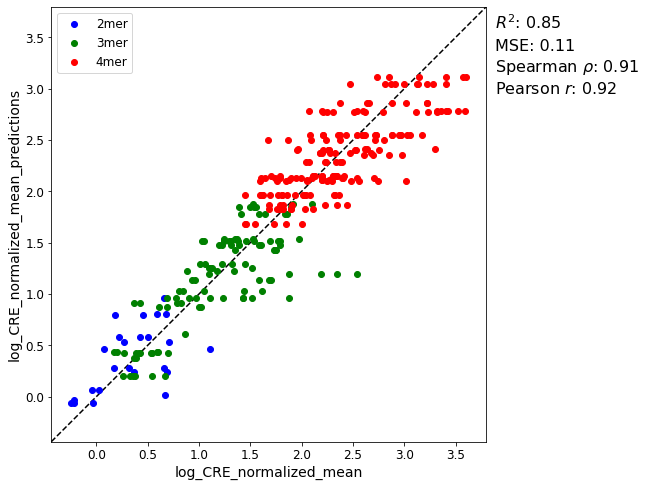

In [24]:
val_idx = np.where(sdata.seqs_annot["train_val"] == False)[0]
eu.pl.performance_scatter(
    sdata,
    target_keys="log_CRE_normalized_mean",
    prediction_keys="log_CRE_normalized_mean_predictions",
    seq_idx=val_idx,
    groupby="Class"
)

# Genomic sequences

In [37]:
sdata = eu.dl.read_h5sd(os.path.join(dataset_dir, "king20", "GEN.h5sd"))
sdata

OSError: Unable to open file (unable to open file: name = '/cellar/users/aklie/data/eugene/king20/GEN.h5sd', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## GkmSVM

In [26]:
eu.external.gkm_svm.fit?

Signature:
eu.external.gkm_svm.fit(
    sdata,
    target_key,
    train_key=None,
    task='binary_classification',
    kernel_type='gkm',
    word_length=11,
    informative_columns=7,
    mismatches=3,
    gamma=1.0,
    decay_M=50,
    half_life=50,
    reverse_complement=False,
    regularization_strength=1.0,
    epsilon=0.001,
    positive_weight=1.0,
    cached_mem_size=8000,
    threads=None,
    verbose=2,
    data_dir=None,
    log_dir=None,
    name='seqs',
    prefix='',
    suffix='',
)
Docstring: <no docstring>
File:      /mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/gkm_svm/_gkm_svm.py
Type:      function


In [38]:
eu.external.gkm_svm.fit(
    sdata,
    target_key = "log_CRE_normalized_mean",
    train_key = "train_val",
    data_dir=os.path.join(dataset_dir, "king20"),
    log_dir=os.path.join(models_dir, "gkm_svm"),
    name="GEN",
    word_length=8,
    informative_columns=6
)

Train files already exist, skipping generation
Fitting model
Model fit, log file saved to /cellar/users/aklie/projects/use_cases/king20/models/gkm_svm/GEN_fit.log


In [40]:
eu.external.gkm_svm.predict?

Signature:
eu.external.gkm_svm.predict(
    model,
    sdata=None,
    file_names=None,
    data_dir=None,
    log_dir=None,
    out_dir=None,
    file_label=None,
    threads=None,
    prefix='',
    suffix='',
    verbose=2,
)
Docstring: <no docstring>
File:      /mnt/beegfs/users/aklie/projects/EUGENe/eugene/external/gkm_svm/_gkm_svm.py
Type:      function


In [42]:
eu.external.gkm_svm.predict(
    model="GEN",
    file_names=["GEN_val_neg.fasta", "GEN_val_pos.fasta"],
    data_dir=os.path.join(dataset_dir, "king20"),
    log_dir=os.path.join(models_dir, "gkm_svm"),
    out_dir=os.path.join(models_dir, "gkm_svm"),
    file_label=
)

/cellar/users/aklie/projects/use_cases/king20/models/gkm_svm/GEN.model.txt
Predictions saved to /cellar/users/aklie/eugene_output/sdata_predictions.txt
Predictions saved to /cellar/users/aklie/eugene_output/sdata_predictions.txt
